In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### **Data Cleaning**

#### Drop unwanted columns.

In [116]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### Split category column into two part 1)category 2) target label

In [117]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [118]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [119]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [120]:
df.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

### **Sex Feature**

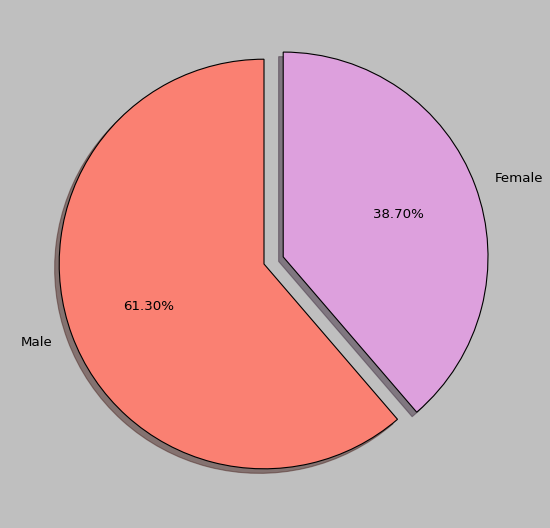

In [121]:
plt.figure(figsize=(10,8))
plt.pie(x=df.Sex.value_counts(),
        labels=["Male","Female"],
        shadow = True, 
        autopct="%1.2f%%", 
        colors=['salmon','plum'], 
        explode = (0, 0.1), 
        startangle=90
        );

### **Age**

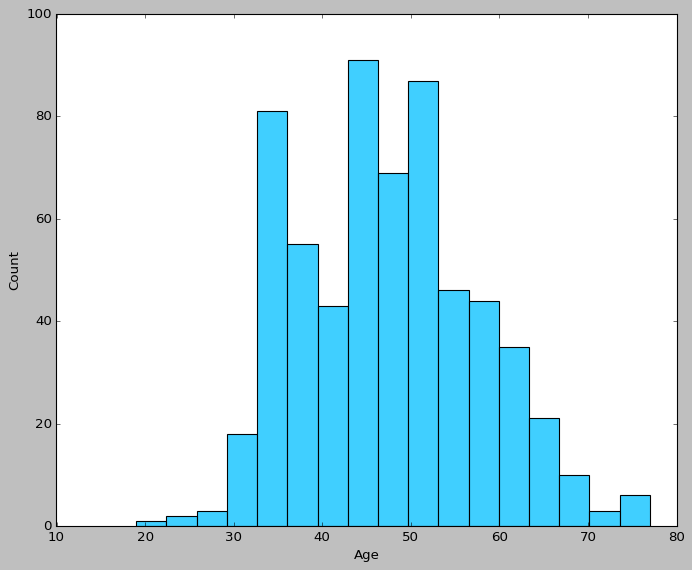

In [122]:
plt.figure(figsize=(10,8))
sns.histplot(x='Age',data=df,color='deepskyblue');

In [123]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

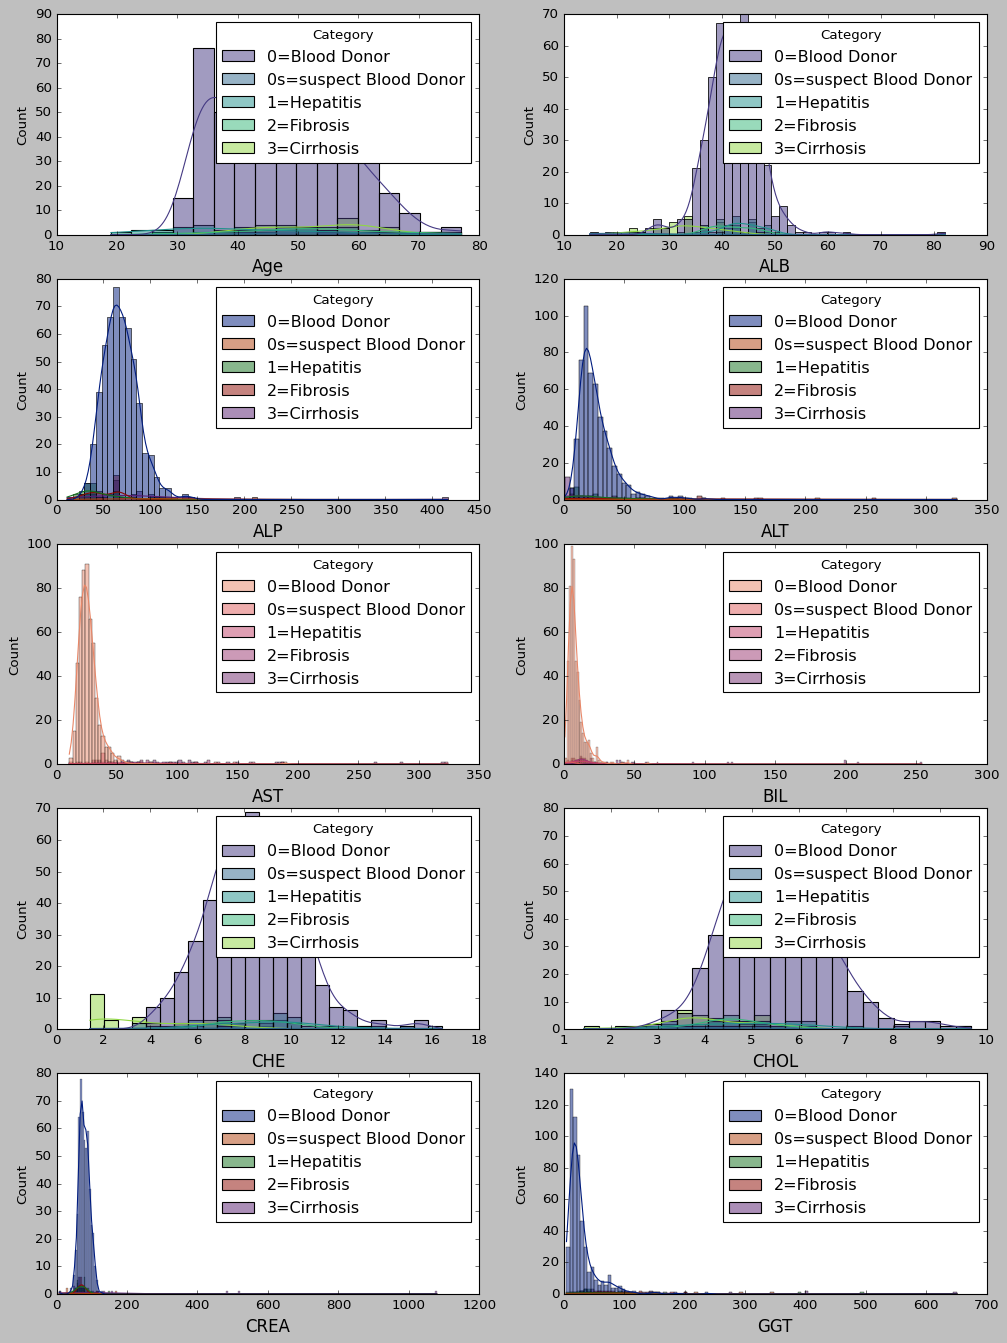

In [124]:
fig, ax =plt.subplots(5,2, figsize=(15,20)) 
plt.style.use("classic")
sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);

sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

In [136]:
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 2, "3=Cirrhosis" : 3})
df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [126]:
df.Category.value_counts()

0    540
3     30
1     24
2     21
Name: Category, dtype: int64

In [127]:
X = df.drop('Category',axis=1)
y = df.Category

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [129]:
print("Training data size : ",X_train.shape)
print("Validation data size : ",X_test.shape)

Training data size :  (492, 12)
Validation data size :  (123, 12)


In [130]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9349593495934959

### **Classification Report for Logistic Regression**
### Class 0=Blood Donor and suspect Blood Donor , class 1=Hepatitis, class 2=Fibrosis, class 3=Cirrhosis

In [131]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       1.00      0.40      0.57         5
           2       0.33      0.67      0.44         3
           3       0.86      0.67      0.75         9

    accuracy                           0.93       123
   macro avg       0.79      0.68      0.69       123
weighted avg       0.95      0.93      0.93       123



In [132]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9349593495934959

### **Classification Report for Random Forest**

In [133]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.67      0.40      0.50         5
           2       0.25      0.33      0.29         3
           3       1.00      0.78      0.88         9

    accuracy                           0.93       123
   macro avg       0.72      0.63      0.66       123
weighted avg       0.94      0.93      0.93       123



In [134]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9024390243902439

### **Classification Report for Support Vector Machine**

In [135]:
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       106
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.78      0.78      0.78         9

    accuracy                           0.90       123
   macro avg       0.43      0.44      0.43       123
weighted avg       0.86      0.90      0.88       123

